# Imports

In [6]:
import requests
import pandas as pd
from datetime import datetime, timedelta


# Variables

In [7]:
base: list[str] = ["EUR", "USD", "CZK"]
end_date = datetime.now().strftime("%Y-%m-%d")
start_date = datetime.strftime(datetime.now() - timedelta(days=90), "%Y-%m-%d")
out_curr: str = "HUF"
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"
}
rates = []

# Data collecting

In [8]:
for bcurr in base:
    url = f"https://api.exchangerate.host/timeseries?base={bcurr}&start_date={start_date}&end_date={end_date}&symbols={out_curr}"
    response = requests.get(url, headers=headers, timeout=25)

    data = response.json()

    for i, j in data["rates"].items():
        rates.append([i, bcurr, j[out_curr]])

df = pd.DataFrame(rates)

df.columns = ["date", "curr", "rate"]


In [9]:
dfa = df.pivot_table(index="date", columns="curr", values="rate", aggfunc="mean")
dfa.reset_index(inplace=True)
dfa["date"] = pd.to_datetime(dfa["date"])


In [10]:
dfa["a30EUR"] = dfa["EUR"].rolling(window = 30).mean()
dfa["a30USD"] = dfa["USD"].rolling(window = 30).mean()
dfa["a30CZK"] = dfa["CZK"].rolling(window = 30).mean()

dfa["a15EUR"] = dfa["EUR"].rolling(window = 15).mean()
dfa["a15USD"] = dfa["USD"].rolling(window = 15).mean()
dfa["a15CZK"] = dfa["CZK"].rolling(window = 15).mean()


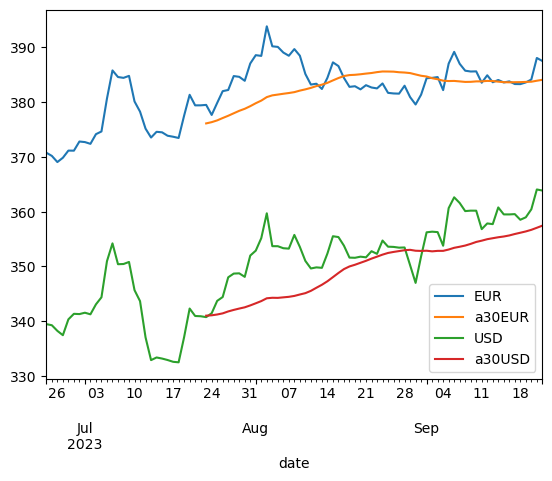

In [11]:
dfa.plot(kind="line", x="date", y=["EUR", "a30EUR", "USD", "a30USD"]).legend(loc="best")


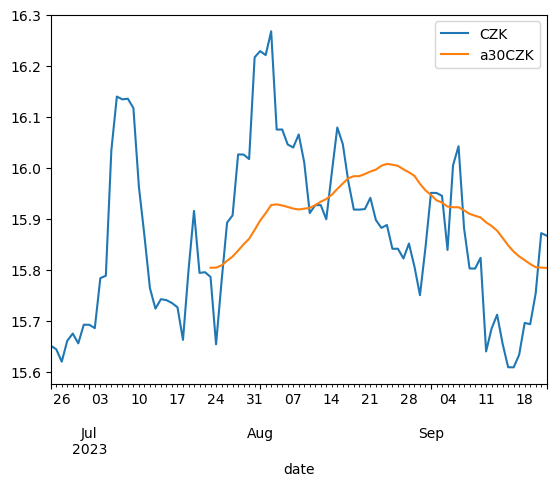

In [12]:

dfa.plot(kind="line", x="date", y=["CZK", "a30CZK"]).legend(loc="best")


In [13]:
dfa[-5:]

curr,date,CZK,EUR,USD,a30EUR,a30USD,a30CZK,a15EUR,a15USD,a15CZK
86,2023-09-18,15.695355,383.252390,358.496659,383.614094,356.129785,15.818388,384.792852,359.264737,15.761843
87,2023-09-19,15.692867,383.561291,358.946151,383.656307,356.369255,15.810864,384.886478,359.610522,15.752136
88,2023-09-20,15.753576,384.092919,360.406548,383.690838,356.661332,15.804626,384.693150,359.596251,15.735413
89,2023-09-21,15.871427,388.024924,364.025056,383.870424,357.036886,15.803768,384.618781,359.691657,15.724052
90,2023-09-22,15.866461,387.473432,363.831968,384.037191,357.422082,15.803259,384.652834,359.843086,15.723076
